In [1]:
import pandas as pd
import numpy as np
import seaborn as sb; sb.set()
import matplotlib.pyplot as plt

In [2]:
#Gaussian Naive Bayes to predict Iris dataset
iris = sb.load_dataset('iris')
X = iris.drop('species', axis = 1)
y = iris['species']

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

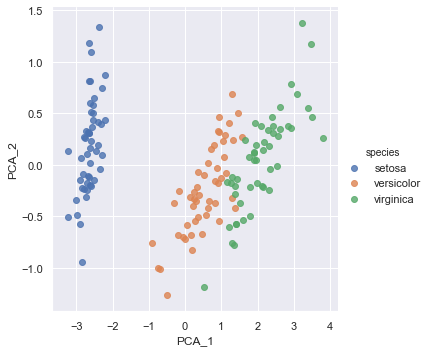

In [12]:
#Unsupervised Learning: Dimensionality Reduction
from sklearn.decomposition import PCA
iris = sb.load_dataset('iris')
X = iris.drop('species', axis = 1)

model = PCA(n_components = 2)
model.fit(X)
X_2D = model.transform(X)
iris['PCA_1'] = X_2D[:,0]
iris['PCA_2'] = X_2D[:,1]
sb.lmplot('PCA_1', 'PCA_2', hue = 'species', data = iris, fit_reg = False)

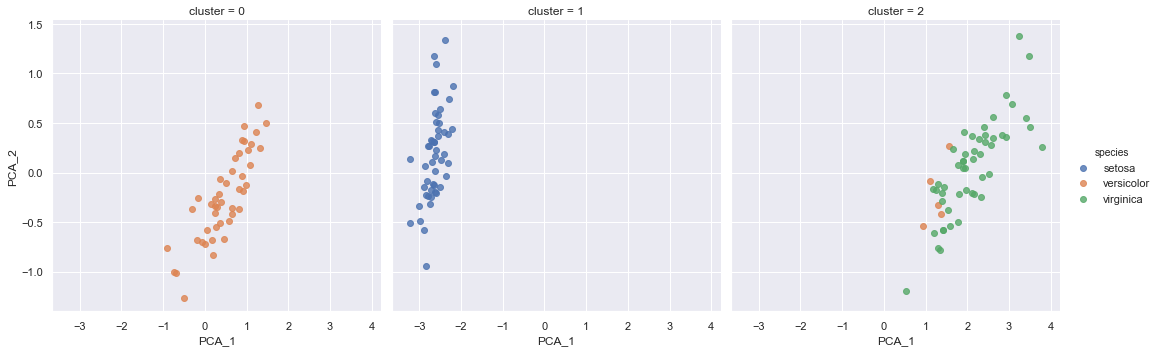

In [13]:
#Unsupervised Learning: Clustering
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 3, covariance_type = 'full')
model.fit(X)
y_gmm = model.predict(X)
iris['cluster'] = y_gmm
sb.lmplot('PCA_1', 'PCA_2', hue = 'species', col = 'cluster', data = iris, fit_reg = False)

(1797, 8, 8)


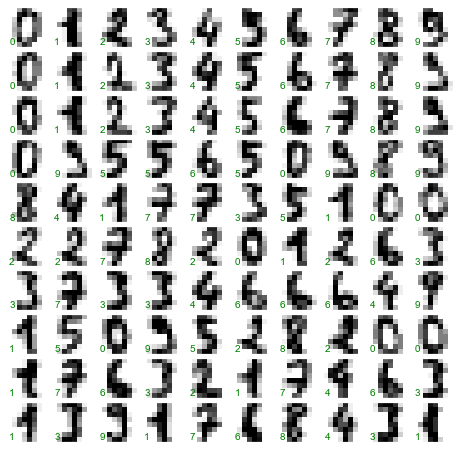

In [2]:
# Recognising Handwritten Digits with Classification under Gaussian Naive Bayes
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images.shape)

f, axes = plt.subplots(10, 10, figsize = (8, 8), subplot_kw = {'xticks':[], 'yticks':[]},
                      gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'green')

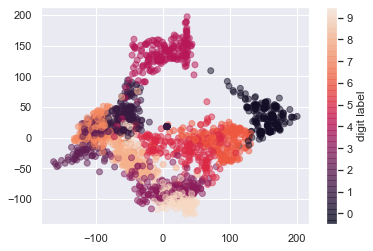

In [3]:
#Dimensionality Reduction to reduce the dimension of the 64 values for the 8x8 image to just 2D
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

plt.scatter(data_projected[:,0], data_projected[:,1], c = digits.target, alpha = 0.5, edgecolor = None)
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

0.8533333333333334


Text(77.10000000000001, 0.5, 'True value')

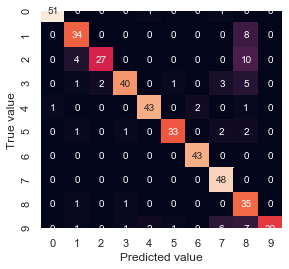

In [4]:
#Classification on Digits
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred=  model.predict(X_test)

print(accuracy_score(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sb.heatmap(mat, annot = True, square = True, cbar = False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

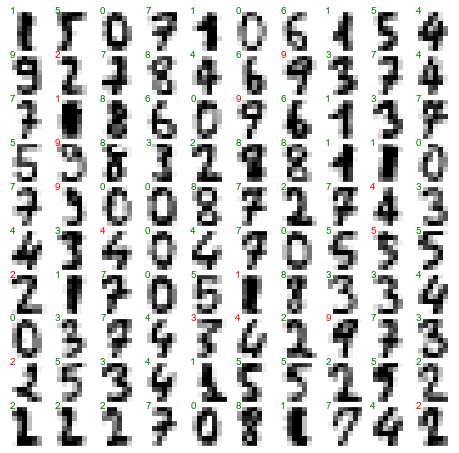

In [7]:
#Showing the predicted labels beside the inputs
f, axes = plt.subplots(10, 10, figsize = (8, 8), subplot_kw = {'xticks':[], 'yticks':[]},
            gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(y_test[i]), color = 'green' if (y_pred[i] == y_test[i]) else 'red')
    
#This piece of code obtained from the book is wrong. The incorrect labels are not beside the corresponding images as 
#X_test is obtained by using train-test-split